# Problem Set 2 Notebook 

### Contributors : 
* Zeineb Sahnoun
* Firas Kanoun
* Sami Ben Hassen
* Nourchene Ben Romdhane

# Relevant Imports

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Read the data and create a network graph**

In [6]:
edges = []
vertices = set()
with open("SMS-network.txt", "r") as f:
    lines = f.readlines()
    for l in lines:
        relation = [int(x) for x in l.split()]
        edges.append(tuple(relation))
        vertices.update(relation)        
vertices = list(vertices)

In [7]:
graph=nx.Graph()
graph.add_nodes_from(vertices)
graph.add_edges_from(edges)

**This is how our network looks like**

/Users/macbook/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


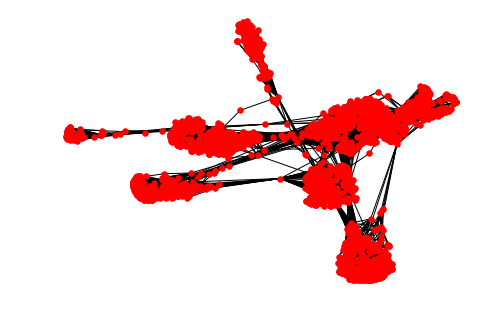

In [8]:
nx.draw(graph,node_size=30)

**Now we try to identify the influencers: It should be the nodes with highest degree in our graph.**

In [34]:
degrees=np.array(graph.degree())
degrees=sorted(degrees, key=lambda x: x[1], reverse=True)
degrees_values = pd.DataFrame([deg[1] for deg in degrees])
print(degrees_values.describe())

                 0
count  4039.000000
mean     43.691013
std      52.420605
min       1.000000
25%      11.000000
50%      25.000000
75%      57.000000
max    1045.000000


**It seems that the highest number of contacts a user have is 1045, but the mean is approximately of 43 contacts and only 25% of the users have more than 57contacts.**

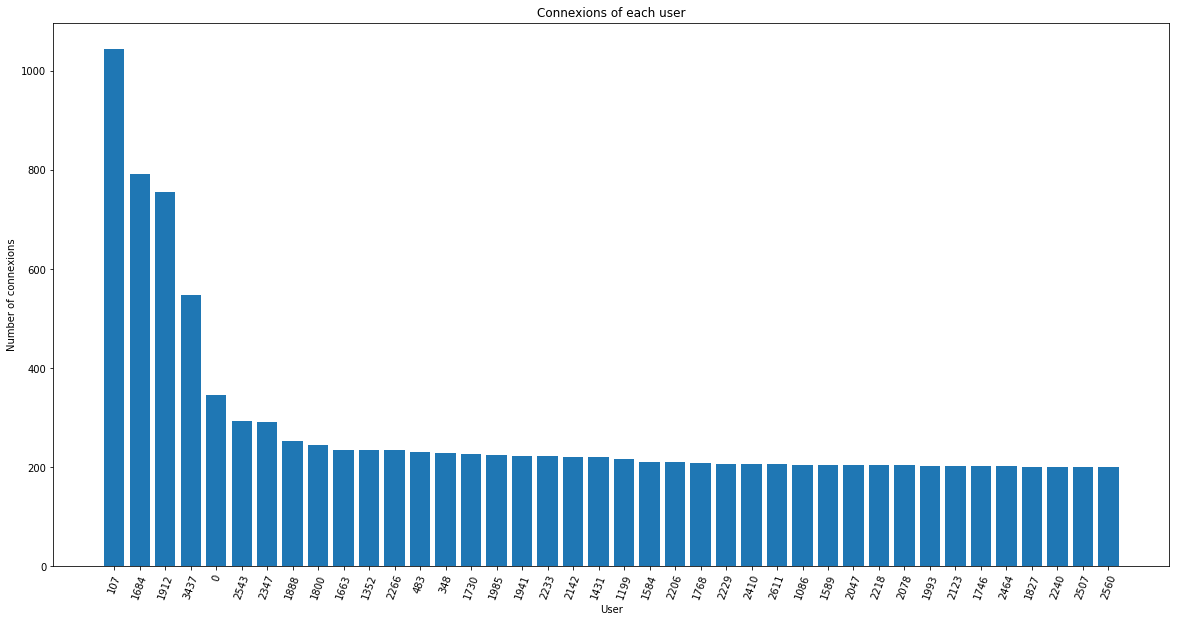

In [35]:
degrees=degrees[:40]
plt.figure(figsize=(20, 10))
plt.bar(range(len(degrees)), [val[1] for val in degrees], align='center')
plt.xticks(range(len(degrees)), [val[0] for val in degrees])
plt.title('Connexions of each user')
plt.ylabel('Number of connexions')
plt.xlabel('User')
plt.xticks(rotation=70)
plt.show()